In [2]:
import os

DATA_FOLDER = os.path.abspath(os.path.join('..', 'data'))
FIGURE_FOLDER = os.path.abspath(os.path.join('..', 'figures'))

notebook_name = '051_run_pep_keras_genomics'

data_folder = os.path.join(DATA_FOLDER, notebook_name)
figure_folder = os.path.join(FIGURE_FOLDER, notebook_name)

! mkdir -p $data_folder
! mkdir -p $figure_folder

input_folder = os.path.join(DATA_FOLDER, '023_make_train_valid_test_sets')

In [3]:
data_folder

'/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics'

In [4]:
input_folder

'/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets'

In [5]:
ls -lha $input_folder

total 25M
drwxr-xr-x  2 root root 4.0K May 26 03:21 ./
drwxrwxr-x 16 2002 2002 4.0K May 29 16:38 ../
-rw-r--r--  1 root root  16K May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.test
-rw-r--r--  1 root root  53K May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.train
-rw-r--r--  1 root root 7.6K May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.valid
-rw-r--r--  1 root root 2.9M May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.test
-rw-r--r--  1 root root 9.9M May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.train
-rw-r--r--  1 root root 1.5M May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.valid
-rw-r--r--  1 root root 7.1K May 26 03:21 Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450.target.tsv.test
-rw-r--r--  1 root root  25K May 26 03:21 Homo_sapiens.GRCh38.cds.all.fa.nuclear_o

In [29]:
! head $input_folder/*

==> /src/myhome/code/sequence-localization/data/022_slice_seqs_to_same_lengths/Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500 <==
>ENST00000419783.2 cdna chromosome:GRCh38:3:49357171:49358600:-1 gene:ENSG00000233276.4 gene_biotype:polymorphic_pseudogene transcript_biotype:protein_coding gene_symbol:GPX1 description:glutathione peroxidase 1 [Source:HGNC Symbol;Acc:HGNC:4553]
GCTCTTCGAGAAGTGCGAGGTGAACGGTGCGGGGGCGCACCCTCTCTTCGCCTTCCTGCG
GGAGGCCCTGCCAGCTCCCAGCGACGACGCCACCGCGCTTATGACCGACCCCAAGCTCAT
CACCTGGTCTCCGGTGTGTCGCAACGATGTTGCCTGGAACTTTGAGAAGTTCCTGGTGGG
CCCTGACGGTGTGCCCCTACGCAGGTACAGCCGCCGCTTCCAGACCATTGACATCGAGCC
TGACATCGAAGCCCTGCTGTCTCAAGGGCCCAGCTGTGCCTAGGGCGCCCCTCCTACCCC
GGCTGCTTGGCAGTTGCAGTGCTGCTGTCTCGGGGGGGTTTTCATCTATGAGGGTGTTTC
CTCTAAACCTACGAGGGAGGAACACCTGATCTTACAGAAAATACCACCTCGAGATGGGTG
CTGGTCCTGTTGATCCCAGTCTCTGCCAGACCAAGGCGAGTTTCCCCACTAATAAAGTGC
CGGGTGTCAGCAGAACTGTG

==> /src/myhome/code/sequence-localization/data/022_slice_seqs_to_same_lengths/Homo_sapiens.GRCh3

In [10]:
ls $DATA_FOLDER/001_amino_acid_encoding

molecular_weight.csv  side_chain_charge.csv  side_chain_polarity.csv
one_hot_encoding.csv  side_chain_class.csv


In [1]:
# from tensorflow.python.client import device_lib ; print(device_lib.list_local_devices())

### Keras-genomics wants mapping files that are tab-separated and have no headers

In [13]:
import glob
import pandas as pd

encoding_folder = os.path.join(DATA_FOLDER, '001_amino_acid_encoding')

for csv in glob.glob(os.path.join(encoding_folder, '*.csv')):
    basename = os.path.basename(csv)
    tsv = os.path.join(data_folder, basename.replace('csv', 'tsv'))
    df = pd.read_csv(csv)
    df.to_csv(tsv, sep='\t', header=False, index=False)
! head $data_folder/*tsv

==> /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/molecular_weight.tsv <==
A	89.094
C	121.154
D	133.10399999999998
E	147.131
F	165.192
G	75.067
H	155.156
I	131.175
K	146.189
L	131.175

==> /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/one_hot_encoding.tsv <==
A	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
C	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
D	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
E	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
F	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
G	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
H	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
I	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0
K	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0
L	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0

==> /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/side_chain_charge.tsv <==
A	0	1.0	0.0
C	0	1.0	0.0
D	1	0.0	0.0
E	1	0.0	0.0
F	0	1.0	0.0
G	0	1.0	0.0
H	0	0.9	0.1
I	0	1.0	0.0
K	0	0.0	1.0
L	0	1.0	0.0

==> /sr

In [17]:
%%bash -s "input_folder='$input_folder'; echo input_folder: $input_folder"

data_folder=/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics
input_folder=/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets
EXPT_DIR=$data_folder/pep_expt01
MAPPERFILE='/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/one_hot_encoding.tsv'


PREFIX='Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150'

for dtype in 'train' 'valid' 'test'
do
    echo Making $dtype dataset ...
    echo "\tCommand: python /src/myhome/code/Keras-genomics/embedH5.py \
        --mapperfile $MAPPERFILE \
        $input_folder/$PREFIX.$dtype \
        $input_folder/$PREFIX.target.tsv.$dtype \
        $EXPT_DIR/$dtype.h5"
    python /src/myhome/code/Keras-genomics/embedH5.py \
        --mapperfile $MAPPERFILE \
        $input_folder/$PREFIX.$dtype \
        $input_folder/$PREFIX.target.tsv.$dtype \
        $EXPT_DIR/$dtype.h5
done

Making train dataset ...
\tCommand: python /src/myhome/code/Keras-genomics/embedH5.py         --mapperfile /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/one_hot_encoding.tsv         /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.train         /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.target.tsv.train         /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/train.h5
args: Namespace(batch=5000, dataname='data', infile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.train', infile2='', isseq='Y', labelfile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.target.tsv.train', l

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
# %run -d -b 40 /src/myhome/code/Keras-genomics/embedH5.py /src/myhome/code/sequence-localization/data/022_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.test         /src/myhome/code/sequence-localization/data/022_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.target.tsv.test         /src/myhome/code/sequence-localization/data/040_run_cdna_keras_genomics/cdna_expt01/test.h5

In [42]:
! pip install future

    100% |################################| 829kB 3.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /root/.cache/pip/wheels/bf/c9/a3/c538d90ef17cf7823fa51fc701a7a7a910a80f6a405bf15b1a
Successfully built future
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
hyperas 0.4 requires jupyter, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.


In [18]:
! python /src/myhome/code/Keras-genomics/main.py -d $data_folder/pep_expt01 -m /src/myhome/code/Keras-genomics/example/model.py -y -t -e

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/train.h5.batch1 ...
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/train.h5.batch2 ...
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/valid.h5.batch1 ...

*** 9 configurations x 2.2 iterations each

1 | Tue May 29 16:54:09 2018 | lowest loss so far: inf (run -1)

iterations: 2.2222222222222223
{'DELTA': 0.0001, 'DROPOUT': 0.5, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/2
2018-05-29 16:54:09.660816: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU 

6300/6300 [==============================] - 1s 208us/step - loss: 0.6660 - acc: 0.6197 - val_loss: 0.6818 - val_acc: 0.5944
Epoch 2/2
900/900 [==============================] - 0s 80us/step

3 seconds.

*** 3.0 configurations x 6.7 iterations each

10 | Tue May 29 16:54:34 2018 | lowest loss so far: 0.6728 (run 9)

iterations: 6.666666666666667
{'DELTA': 1e-08, 'DROPOUT': 0.1, 'MOMENT': 0.999}

Train on 6300 samples, validate on 900 samples
Epoch 1/7
6300/6300 [==============================] - 1s 216us/step - loss: 0.6673 - acc: 0.6187 - val_loss: 0.6751 - val_acc: 0.5944
Epoch 2/7
6300/6300 [==============================] - 1s 86us/step - loss: 0.6584 - acc: 0.6203 - val_loss: 0.6764 - val_acc: 0.5944
Epoch 3/7
6300/6300 [==============================] - 1s 83us/step - loss: 0.6471 - acc: 0.6265 - val_loss: 0.6775 - val_acc: 0.5967
Epoch 4/7
900/900 [==============================] - 0s 84us/step

4 seconds.

11 | Tue May 29 16:54:38 2018 | lowest loss so far: 0.6728 (run 9)

iter

6300/6300 [==============================] - 1s 86us/step - loss: 0.6614 - acc: 0.6198 - val_loss: 0.6829 - val_acc: 0.5944
Epoch 4/7
900/900 [==============================] - 0s 77us/step

4 seconds.
{'DELTA': 1e-08, 'DROPOUT': 0.1, 'MOMENT': 0.999}
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/train.h5.batch1 ...
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/train.h5.batch2 ...
Reading /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/valid.h5.batch1 ...
Train on 6300 samples, validate on 900 samples
Epoch 1/20
6300/6300 [==============================] - 2s 309us/step - loss: 0.6673 - categorical_accuracy: 0.6211 - val_loss: 0.6742 - val_categorical_accuracy: 0.5944

Epoch 00001: val_loss improved from inf to 0.67417, saving model to /src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/model/model_bestmodel_weights.h5
Epoch 2/20
6300/6

In [49]:
%run -d -b 1

000_filter_for_differentially_localized_proteins.ipynb
001_granularity_levels_ontology.ipynb
003_count_kmers.ipynb
004_format_classification_vector.ipynb
005_sourmash.ipynb
006_download_sra.ipynb
007_fastq-dump.ipynb
010_trinity.ipynb
020_get_nucleus_cytoplasm_genes.ipynb
021_get_nucleus_cytoplasm_sequences.ipynb
022_slice_seqs_to_same_lengths.ipynb
023_make_train_valid_test_sets.ipynb
031_prepare_keras_genomics.ipynb
040_dockerfiles.ipynb
050_run_cdna_keras_genomics.ipynb
genome/
tmp.tsv


In [56]:
! ls genome/hg38/**/*

genome/hg38/ensembl/data:
021_get_nucleus_cytoplasm_sequences

genome/hg38/ensembl/figures:
021_get_nucleus_cytoplasm_sequences

genome/hg38/ensembl/v92:


In [23]:
ls $data_folder/cdna_expt01

ls: cannot access '/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/cdna_expt01': No such file or directory


In [24]:
! head $data_folder/cdna_expt01/*txt

head: cannot open '/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/cdna_expt01/*txt' for reading: No such file or directory


In [60]:
! ls ls $data_folder/cdna_expt01/model

ls: cannot access 'ls': No such file or directory
/src/myhome/code/sequence-localization/data/040_run_cdna_keras_genomics/cdna_expt01/model:
model.traindone		    model_bestmodel_weights.h5
model.training_history.txt  model_eval.txt
model_best_archit.json	    model_lastmodel_weights.h5
model_best_optimer.pkl


In [61]:
! head $data_folder/cdna_expt01/model/*

==> /src/myhome/code/sequence-localization/data/040_run_cdna_keras_genomics/cdna_expt01/model/model.traindone <==

==> /src/myhome/code/sequence-localization/data/040_run_cdna_keras_genomics/cdna_expt01/model/model.training_history.txt <==
# loss	acc	val_loss	val_acc
6.845415016396301233e-01	6.056092528151437726e-01	6.653350319407731472e-01	6.230598563894199637e-01
6.654574580170654619e-01	6.174932645931615616e-01	6.626743577800674467e-01	6.230598563894199637e-01
6.652022577129212966e-01	6.174932668976352845e-01	6.628346077090092603e-01	6.230598563894199637e-01
6.644745944532685078e-01	6.160671834030689853e-01	6.626946000328614028e-01	6.230598563894199637e-01
6.642372228041104609e-01	6.174932672187504190e-01	6.638626333350881037e-01	6.230598563894199637e-01
6.636149164066698081e-01	6.143241921745830059e-01	6.724933963392896175e-01	6.230598563894199637e-01
6.641789974812716268e-01	6.159087300130595688e-01	6.662092445430628507e-01	6.219512099965976981e-01
6.575222254139442279e-01	6.18760

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


txt = os.path.join(data_folder, 'pep_expt01', 'model', 'model.training_history.txt')
! ls $txt
training_history = pd.read_table(txt)
training_history.columns = training_history.columns.str.strip('# ')
print(training_history.shape)
training_history.head()

training_history_reset_index = training_history.reset_index()
training_history_reset_index = training_history_reset_index.rename(columns={'index': 'epoch'})
training_history_reset_index.head()

training_history_tidy = pd.melt(training_history_reset_index, id_vars='epoch')
print(training_history_tidy.shape)
training_history_tidy.head()

/src/myhome/code/sequence-localization/data/051_run_pep_keras_genomics/pep_expt01/model/model.training_history.txt
(19, 4)
(76, 3)


,epoch,variable,value
0,0,loss,0.667253
1,1,loss,0.656530
2,2,loss,0.643010
3,3,loss,0.641408
4,4,loss,0.625183


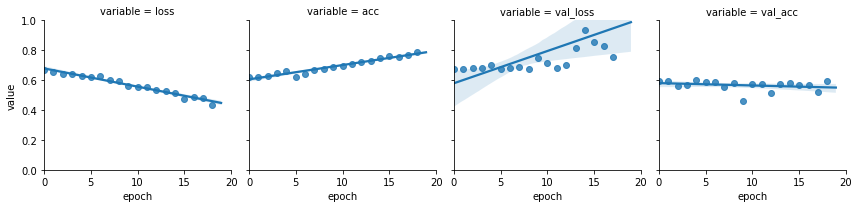

In [39]:
g = sns.FacetGrid(data=training_history_tidy, col='variable')
g.map(sns.regplot, 'epoch', 'value')
g.set(ylim=(0, 1), xlim=(0, 20))